# **Tabular Data Preprocessing:**

Here's a step-by-step guide on what we'll do:

**1. Data Loading:** We'll start by loading the data and examining its structure.

**2. Basic Exploration:** This includes checking the data types, any missing values, and basic statistics of the columns.

**3. Visual Exploration:** Depending on the nature of the data, we'll visualize some key statistics.

**4. Data Cleaning:** We'll handle missing values, outliers, and any other anomalies.

**5. Feature Engineering:** We'll create new features, if necessary.

**6. Data Transformation:** This involves scaling and normalization if required.

## **Step 1: Data Loading**

In [19]:
import pandas as pd

In [21]:
from google.colab import files
uploaded = files.upload()

Saving 2017_Yellow_Taxi_Trip_Data.csv to 2017_Yellow_Taxi_Trip_Data (1).csv
Saving nyc_preds_means.csv to nyc_preds_means.csv


In [26]:
# Load the datasets
yellow_taxi_data = pd.read_csv('./2017_Yellow_Taxi_Trip_Data.csv')
nyc_preds_means = pd.read_csv('./nyc_preds_means.csv')

In [27]:
# Display the first few rows of each dataset to get an overview
yellow_taxi_data_head = yellow_taxi_data.head()
nyc_preds_means_head = nyc_preds_means.head()

yellow_taxi_data_head, nyc_preds_means_head

(   Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
 0    24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
 1    35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
 2   106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
 3    38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
 4    30841670         2  04/15/2017 11:32:20 PM  04/15/2017 11:49:03 PM   
 
    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
 0                6           3.34           1                  N   
 1                1           1.80           1                  N   
 2                1           1.00           1                  N   
 3                1           3.70           1                  N   
 4                1           4.37           1                  N   
 
    PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
 0           100           231             1     

## **Step 2: Basic Exploration**

In [28]:
# Basic Exploration

# Data types and missing values
yellow_taxi_data_info = yellow_taxi_data.info()
nyc_preds_means_info = nyc_preds_means.info()

# Basic statistics for numerical columns
yellow_taxi_data_desc = yellow_taxi_data.describe()
nyc_preds_means_desc = nyc_preds_means.describe()

yellow_taxi_data_info, nyc_preds_means_info, yellow_taxi_data_desc, nyc_preds_means_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

(None,
 None,
          Unnamed: 0      VendorID  passenger_count  trip_distance  \
 count  2.269900e+04  22699.000000     22699.000000   22699.000000   
 mean   5.675849e+07      1.556236         1.642319       2.913313   
 std    3.274493e+07      0.496838         1.285231       3.653171   
 min    1.212700e+04      1.000000         0.000000       0.000000   
 25%    2.852056e+07      1.000000         1.000000       0.990000   
 50%    5.673150e+07      2.000000         1.000000       1.610000   
 75%    8.537452e+07      2.000000         2.000000       3.060000   
 max    1.134863e+08      2.000000         6.000000      33.960000   
 
          RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
 count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
 mean       1.043394    162.412353    161.527997      1.336887     13.026629   
 std        0.708391     66.633373     70.139691      0.496211     13.243791   
 min        1.000000      1.000000

## **Step 3: Visual Exploration**

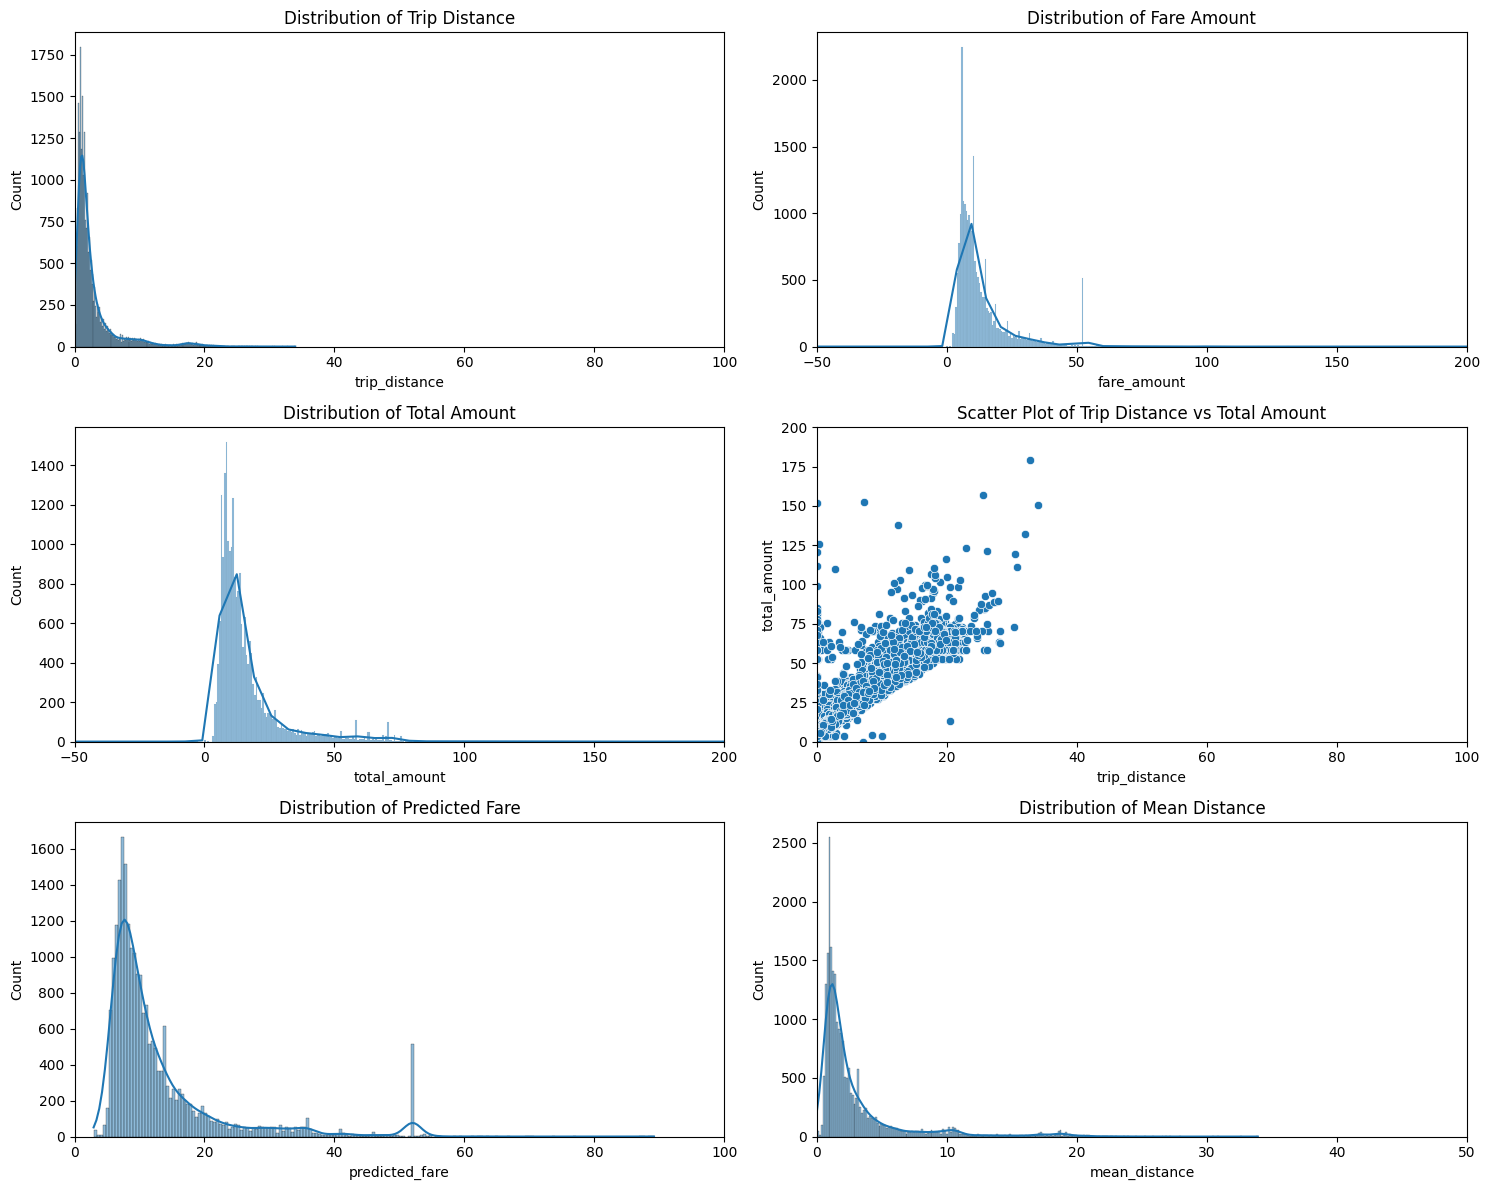

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Distribution plots
sns.histplot(yellow_taxi_data['trip_distance'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Trip Distance')
ax[0, 0].set_xlim(0, 100)

sns.histplot(yellow_taxi_data['fare_amount'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Fare Amount')
ax[0, 1].set_xlim(-50, 200)

sns.histplot(yellow_taxi_data['total_amount'], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Total Amount')
ax[1, 0].set_xlim(-50, 200)

# Scatter plot
sns.scatterplot(x='trip_distance', y='total_amount', data=yellow_taxi_data, ax=ax[1, 1])
ax[1, 1].set_title('Scatter Plot of Trip Distance vs Total Amount')
ax[1, 1].set_xlim(0, 100)
ax[1, 1].set_ylim(0, 200)

# Distribution plots for nyc_preds_means.csv
sns.histplot(nyc_preds_means['predicted_fare'], kde=True, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Predicted Fare')
ax[2, 0].set_xlim(0, 100)

sns.histplot(nyc_preds_means['mean_distance'], kde=True, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of Mean Distance')
ax[2, 1].set_xlim(0, 50)

plt.tight_layout()
plt.show()


## **Step 4: Data Cleaning**

In [30]:
# Investigate trips with passenger_count of 0
zero_passenger_trips = yellow_taxi_data[yellow_taxi_data['passenger_count'] == 0]

# Investigate trips with trip_distance of 0
zero_distance_trips = yellow_taxi_data[yellow_taxi_data['trip_distance'] == 0]

# Investigate negative fare_amount and total_amount
negative_fare = yellow_taxi_data[yellow_taxi_data['fare_amount'] < 0]
negative_total = yellow_taxi_data[yellow_taxi_data['total_amount'] < 0]

zero_passenger_trips.shape[0], zero_distance_trips.shape[0], negative_fare.shape[0], negative_total.shape[0]


(33, 148, 14, 14)

### First examine the trips with a trip_distance of 0 to see their fare components.​

In [31]:
# Examine trips with trip_distance of 0
zero_distance_trips[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']].head(10)


,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
128,20.0,0.0,0.0,0.00,0.00,0.3,20.30
246,2.5,0.5,0.5,0.00,0.00,0.3,3.80
291,2.5,1.0,0.5,0.00,0.00,0.3,4.30
319,2.5,0.5,0.5,0.00,0.00,0.3,3.80
424,2.5,0.0,0.5,6.70,0.00,0.3,10.00
470,34.0,0.0,0.5,6.96,0.00,0.3,41.76
472,9.5,1.0,0.5,0.00,0.00,0.3,11.30
572,52.0,0.0,0.5,11.71,5.76,0.3,70.27
647,2.5,0.5,0.5,3.00,0.00,0.3,6.80
795,8.0,0.0,0.5,0.00,0.00,0.3,8.80


### Now, let's proceed with the cleaning:

### 1. Remove trips with a passenger_count of 0.
### 2.  Remove trips with a trip_distance of 0.
### 3.  Remove trips with negative fare_amount and total_amount.​

In [32]:
# Data Cleaning

# Remove trips with passenger_count of 0
cleaned_yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['passenger_count'] != 0]

# Remove trips with trip_distance of 0
cleaned_yellow_taxi_data = cleaned_yellow_taxi_data[cleaned_yellow_taxi_data['trip_distance'] != 0]

# Remove trips with negative fare_amount and total_amount
cleaned_yellow_taxi_data = cleaned_yellow_taxi_data[cleaned_yellow_taxi_data['fare_amount'] >= 0]
cleaned_yellow_taxi_data = cleaned_yellow_taxi_data[cleaned_yellow_taxi_data['total_amount'] >= 0]

# Check the shape after cleaning
cleaned_yellow_taxi_data.shape


(22506, 18)

## **Step 5: Feature Engineering**


In [33]:
# Convert datetime columns to datetime type
cleaned_yellow_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(cleaned_yellow_taxi_data['tpep_pickup_datetime'])
cleaned_yellow_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(cleaned_yellow_taxi_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
cleaned_yellow_taxi_data['trip_duration'] = (cleaned_yellow_taxi_data['tpep_dropoff_datetime'] - cleaned_yellow_taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract time of day and day of week
cleaned_yellow_taxi_data['hour_of_day'] = cleaned_yellow_taxi_data['tpep_pickup_datetime'].dt.hour
cleaned_yellow_taxi_data['day_of_week'] = cleaned_yellow_taxi_data['tpep_pickup_datetime'].dt.dayofweek

# Display the first few rows with the new features
cleaned_yellow_taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration', 'hour_of_day', 'day_of_week']].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,hour_of_day,day_of_week
0,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,8,5
1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,14,1
2,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,7,4
3,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,13,6
4,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,23,5


## **Step 6: Data Transformation**

### **Let's focus on the following transformation tasks:**

**1. Scaling:** To make sure that all the numerical features have the same scale, we can use techniques like Min-Max Scaling or Standard Scaling (Z-score normalization). Standard Scaling is commonly used as it scales the data to have a mean of 0 and a standard deviation of 1.

**2. Encoding Categorical Data:** If there are categorical variables in the data, we need to convert them into a format that can be provided to machine learning algorithms, using techniques like one-hot encoding or label encoding.

### **A) Scaling:**

In [35]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
columns_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the specified columns
cleaned_yellow_taxi_data[columns_to_scale] = scaler.fit_transform(cleaned_yellow_taxi_data[columns_to_scale])

# Display the first few rows after scaling
cleaned_yellow_taxi_data[columns_to_scale].head()

,trip_distance,fare_amount,total_amount,trip_duration
0,0.110832,0.001890,0.019615,-0.048767
1,-0.310006,0.238633,0.292035,0.153197
2,-0.528624,-0.511056,-0.482177,-0.160308
3,0.209210,0.593749,0.734717,0.214111
4,0.392302,0.278091,0.099285,-0.005721


In [36]:
# Reload the necessary libraries and the cleaned dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset (assuming the previous cleaning steps have been applied in your Colab environment)
yellow_taxi_data = pd.read_csv('./2017_Yellow_Taxi_Trip_Data.csv')

# Convert datetime columns to datetime type
yellow_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi_data['tpep_pickup_datetime'])
yellow_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(yellow_taxi_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
yellow_taxi_data['trip_duration'] = (yellow_taxi_data['tpep_dropoff_datetime'] - yellow_taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']

# Apply scaling to the specified columns
yellow_taxi_data[columns_to_scale] = scaler.fit_transform(yellow_taxi_data[columns_to_scale])

# Display the first few rows after scaling
scaled_data_preview = yellow_taxi_data[columns_to_scale].head()
scaled_data_preview


,trip_distance,fare_amount,total_amount,trip_duration
0,0.116802,-0.002011,0.015500,-0.047538
1,-0.304759,0.224515,0.278904,0.153016
2,-0.523752,-0.492818,-0.469686,-0.158299
3,0.215348,0.564305,0.706935,0.213504
4,0.398755,0.262270,0.092533,-0.004792


In [38]:
# Load the cleaned dataset from the original path
yellow_taxi_data = pd.read_csv('./2017_Yellow_Taxi_Trip_Data.csv')

# Convert datetime columns to datetime type
yellow_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(yellow_taxi_data['tpep_pickup_datetime'])
yellow_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(yellow_taxi_data['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
yellow_taxi_data['trip_duration'] = (yellow_taxi_data['tpep_dropoff_datetime'] - yellow_taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the specified columns
yellow_taxi_data[columns_to_scale] = scaler.fit_transform(yellow_taxi_data[columns_to_scale])

# Display the first few rows after scaling
scaled_data_preview = yellow_taxi_data[columns_to_scale].head()
scaled_data_preview


,trip_distance,fare_amount,total_amount,trip_duration
0,0.116802,-0.002011,0.015500,-0.047538
1,-0.304759,0.224515,0.278904,0.153016
2,-0.523752,-0.492818,-0.469686,-0.158299
3,0.215348,0.564305,0.706935,0.213504
4,0.398755,0.262270,0.092533,-0.004792


In [39]:
# Define the columns to scale
columns_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']

# Apply scaling to the specified columns
yellow_taxi_data[columns_to_scale] = scaler.fit_transform(yellow_taxi_data[columns_to_scale])

# Display the first few rows after scaling
scaled_data_preview = yellow_taxi_data[columns_to_scale].head()
scaled_data_preview


,trip_distance,fare_amount,total_amount,trip_duration
0,0.116802,-0.002011,0.015500,-0.047538
1,-0.304759,0.224515,0.278904,0.153016
2,-0.523752,-0.492818,-0.469686,-0.158299
3,0.215348,0.564305,0.706935,0.213504
4,0.398755,0.262270,0.092533,-0.004792


### **B) Encoding:**

In [40]:
# Apply one-hot encoding to categorical columns
categorical_columns = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']

# One-hot encode these columns
encoded_data = pd.get_dummies(yellow_taxi_data, columns=categorical_columns)

# Display the first few rows of the encoded dataframe
encoded_data.head()


,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,24870114,2017-03-25 08:55:43,2017-03-25 09:09:47,6,0.116802,-0.002011,0.0,0.5,2.76,0.0,...,0,0,0,0,0,0,1,0,0,0
1,35634249,2017-04-11 14:53:28,2017-04-11 15:19:58,1,-0.304759,0.224515,0.0,0.5,4.00,0.0,...,0,0,0,0,0,0,1,0,0,0
2,106203690,2017-12-15 07:26:56,2017-12-15 07:34:08,1,-0.523752,-0.492818,0.0,0.5,1.45,0.0,...,0,0,0,0,0,0,1,0,0,0
3,38942136,2017-05-07 13:17:59,2017-05-07 13:48:14,1,0.215348,0.564305,0.0,0.5,6.39,0.0,...,0,0,0,0,0,0,1,0,0,0
4,30841670,2017-04-15 23:32:20,2017-04-15 23:49:03,1,0.398755,0.262270,0.5,0.5,0.00,0.0,...,0,0,0,0,0,0,0,1,0,0
